<a href="https://colab.research.google.com/github/woodRock/fishy-business/blob/main/code/EDA/notebooks/EDA_REIMS_Fish_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA - REIMS Fish Data

To mount Google Drive in Google Colab, you can use the following steps:

Run the following code in a cell in your Colab notebook:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


When the code runs, it will display a link that you can click on to authorize Colab to access your Google Drive. Click on the link, sign in to your Google account if prompted, and then grant access to Colab.

Once you have granted access, Colab will display an authorization code. Copy this code and paste it into the text box that appears in the Colab notebook, then hit Enter to complete the authorization process.

After the authorization process is complete, your Google Drive will be mounted to the /content/drive directory in Colab. You can now access the files and folders in your Google Drive by using the !ls or !pwd commands in Colab, or by using the os module in Python to list the files and directories in the /content/drive directory.

For example, to list the files and directories in the root of your Google Drive, you can run the following code in a Colab notebook:

In [2]:
import os
os.listdir('/content/drive/My Drive')

['Violence-Essay',
 'Colab Notebooks',
 'University',
 'oc',
 '.ipynb_checkpoints',
 'nz-walking-and-biking-tracks.tif',
 'ENGR302 Assessment-3_template.xlsx',
 'CDP_draft.pdf',
 'CDP_draft.gdoc',
 'AI',
 'Print Request Form_Fillable_A4.pdf',
 'Christmas List 🎄🎅 (1).gdoc',
 'Christmas List 🎄🎅.gdoc',
 'AJCAI_2022_Book.pdf',
 'Day 3 Keynote 2 - Explainable AI - Tim Miller.mp4']

This code will return a list of the files and directories in the root of your Google Drive. You can then use this information to navigate to and access the specific files or folders that you want to use in your Colab notebook.

To load an xlsx file into memory using Python, you can use the pandas library. The pandas library provides a read_excel() function that can be used to read an xlsx file into a DataFrame object.

This code will join the strings in the path_array variable and print the resulting joined path. The output will be /usr/local/bin.

Note that the * operator is used to unpack the path_array variable so that each element in the array is passed as a separate argument to the os.path.join() function. This allows the function to join the strings in the array together to form a valid path.

To convert the feature names (column names) of a Pandas DataFrame to strings, you can use the DataFrame.columns.astype(str) method. This will convert the column names to strings and return a new index object.

In [3]:
import pandas as pd

def load_data_from_drive(verbose=False):
    # Path to file. 
    path = ['drive', 'MyDrive', 'AI', 'fish', 'REIMS_data.xlsx']
    path = os.path.join(*path)

    # Load the xlsx file into a DataFrame object
    df = pd.read_excel(path)

    if verbose:
        # Print the first few rows of the DataFrame
        print(df.head())

    # convert the column names to strings
    df.columns = df.columns.astype(str)
    
    return df

fish_data = load_data_from_drive()

## Class Distribution

To print summary statistics for a dataframe using pandas, you can use the describe() method. This method will generate summary statistics for all columns of the dataframe that have numerical data.

In [4]:
# print summary statistics for the dataframe
fish_data['m/z'].describe()

count     306
unique     66
top        QC
freq       27
Name: m/z, dtype: object

To create a bar plot of class distribution in pandas for categorical class labels, you can use the value_counts() method to count the number of occurrences of each class, and then use the plot() method to create the bar plot.

To sort a Pandas DataFrame by a categorical column in alphabetical order, you can use the DataFrame.sort_values() method and specify the column you want to sort by. You can also specify that the sorting should be done in ascending order (which is the default) by setting the ascending parameter to True.

Text(0, 0.5, 'Class frequency')

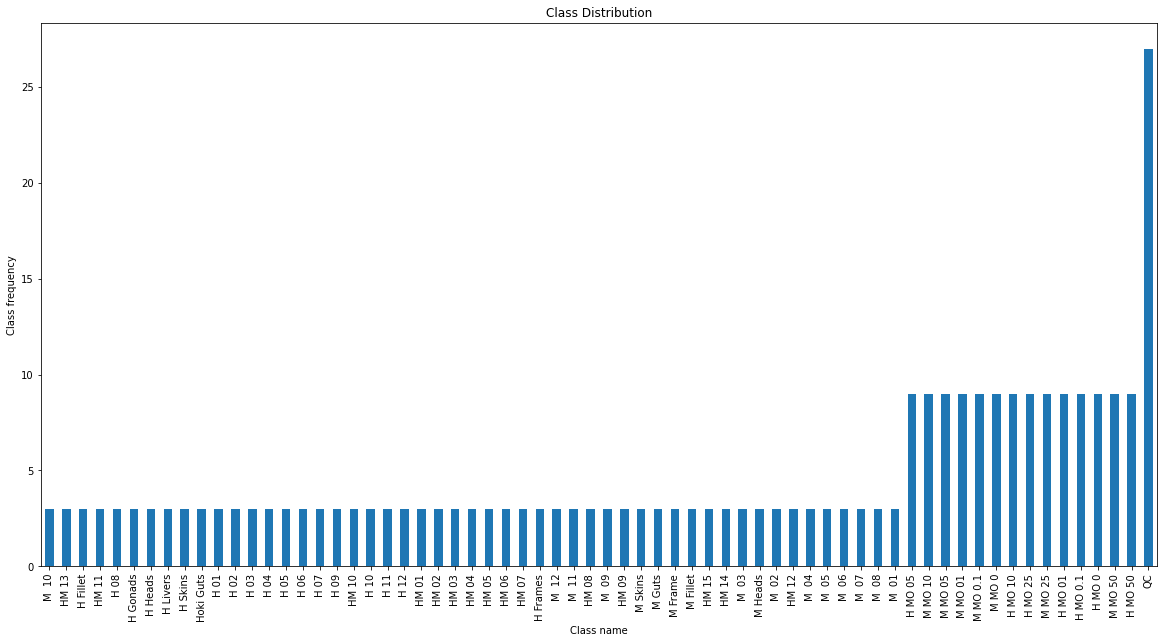

In [5]:
import matplotlib.pyplot as plt

# count the number of occurrences of each class
class_counts = fish_data['m/z'].value_counts()

# sort the DataFrame by the 'class' column in alphabetical order
class_counts = class_counts.sort_values(ascending=True)

# Allow width for 65 classes.
fig = plt.figure(figsize=(20, 10))

# create a bar plot of the class counts
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class name')
plt.ylabel('Class frequency')

## Data Cleaning

In pandas, you can count the trailing whitespace in a class name by using the str.strip() method. This method will remove any leading or trailing whitespace from a string.

The code below shows there are no trailing whitespaces, the count of unique classes is the same, before and after removing trailing whitespaces.

In [6]:
import pandas as pd

def test_trailing_whitespace():
    raw_unique_count = fish_data['m/z'].describe()['unique']
    
    # use the `str.strip()` method to remove the trailing whitespace
    fish_data['m/z'] = fish_data['m/z'].str.strip()
    # print the updated DataFrame

    processed_unique_count = fish_data['m/z'].describe()['unique']

    assert processed_unique_count == raw_unique_count, "The number of unique classes remains equal after stripping whitespaces, thus there are no trailing whitespaces in class labels!"

test_trailing_whitespace()

## Fish Species Classification

To create a new class label based on the values in the first column of a pandas dataframe, you can use the apply() method and a custom function. 

There is no svm, knn, dt, rf, or cnn module in the sklearn package. sklearn is a machine learning library for Python that provides various tools for modeling, including support vector machines (SVM), k-nearest neighbors (KNN), decision trees, and random forests, but it does not have a module for convolutional neural networks (CNNs).

To use support vector machines, k-nearest neighbors, decision trees, and random forests in sklearn, you will need to import the corresponding classes from the appropriate submodules. For example, you can import the SVC class from the sklearn.svm module to create an SVM model, and the KNeighborsClassifier class from the sklearn.neighbors module to create a KNN model.

In [7]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from xgboost import XGBClassifier as XGB
from sklearn.model_selection import cross_val_score

def binary_classification():
    """ Filters the instances into a binary classification problem for predicting fish species. """ 
    # Fresh data, so cell can be rerun independently.
    fish_data = load_data_from_drive()

    def create_new_label(label):
        """ Convert string label into binary label.
        
        Args:
            label (str): The raw label of the fish tissue sample.

        Return: 
            label (int): Binary classification, where Hoki is 0, Mackeral 1, otherwise none.
        """
        if 'H ' in label:
            return 0
        elif 'M ' in label:
            return 1
        else:
            return None
    
    # Apply the function to the 'label' column
    fish_data['class'] = fish_data['m/z'].apply(create_new_label)
    # Binray classification problem.
    # Drop the labels that are neither Hoki or Mackeral.
    fish_data = fish_data.dropna()
    # Avoid data leakage. String label contains class information.
    fish_data = fish_data.drop('m/z', axis=1)
    return fish_data

# Load data from pandas dataframe.
fish_data = binary_classification()
X = fish_data.drop('class', axis=1)
y = fish_data['class']

# Classifier models.
models = {
    "svc" : SVC(),
    "knn" : KNN(),
    "dt"  : DT(),
    "rf"  : RF(),
    "xgb" : XGB(),
    "lda" : LDA()
}

# Evalute the classifiers with 10-fold cross validation.
for name, model in models.items():
    # Perform 10-fold cross validation
    scores = cross_val_score(model, X, y, cv=10)
    # Print results
    print(f"{name} - Accuracy: {scores.mean()} ± {scores.std()}")

svc - Accuracy: 0.9034391534391535 ± 0.15401733794611258
knn - Accuracy: 0.8634920634920634 ± 0.13022861289123935
dt - Accuracy: 0.8238095238095238 ± 0.13837243358808543
rf - Accuracy: 0.8958994708994709 ± 0.12908731446376123
xgb - Accuracy: 0.9067460317460319 ± 0.13467563864635199
lda - Accuracy: 0.9391534391534393 ± 0.12679797864024173


In [9]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=9d50783f3a025389fa5559d5b25db4112ded9ad2206c0f8b35d1c789e7fe10d2
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=658cf34ac9229f7994061017ae677d1ba0468ce13dcd52a9c05866d9f8a482f6
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [10]:
from functools import partial
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

# Dimensionality reduction techniques 
reducers = {
    "pca" : PCA,
    # Fix https://bit.ly/3HF8byo
    "tsne": partial(TSNE, method='exact'),
    "umap": UMAP
}

# Number of components.
n = 20

# For each feature reduction method, perform dimensionality reduction, evaluate classification performance.
for name_reducer, reducer in reducers.items():
    # Start with a clean dataset.
    fish_data = binary_classification()

    # Split into features and labels.
    X = fish_data.drop('class', axis=1)
    y = fish_data['class']

    # Perform feature reduction.
    r = reducer(n_components=n)
    r.fit(X)
    X = r.fit_transform(X)

    print(f"{name_reducer} (n={n})")

    # Evaluate performance on dimensionality reduction techniques.
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=10)
        print(f"{name} - Accuracy: {scores.mean()} ± {scores.std()}")

pca (n=20)
svc - Accuracy: 0.8855820105820106 ± 0.17107041142142373
knn - Accuracy: 0.859920634920635 ± 0.1327774193509543
dt - Accuracy: 0.830952380952381 ± 0.13962490794408902
rf - Accuracy: 0.8816137566137566 ± 0.14457647753601877
xgb - Accuracy: 0.8853174603174605 ± 0.14252858798536558
lda - Accuracy: 0.9214285714285715 ± 0.13997084244475305


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


tsne (n=20)
svc - Accuracy: 0.7005291005291006 ± 0.13364659387554081
knn - Accuracy: 0.6199735449735451 ± 0.09419819170094453
dt - Accuracy: 0.6195767195767197 ± 0.09343569294975664
rf - Accuracy: 0.692989417989418 ± 0.08997324938617167
xgb - Accuracy: 0.6854497354497355 ± 0.08505980124641628
lda - Accuracy: 0.6493386243386243 ± 0.08177866594021845
umap (n=20)
svc - Accuracy: 0.8452380952380952 ± 0.13811829562822442
knn - Accuracy: 0.8412698412698413 ± 0.13257109746084997
dt - Accuracy: 0.8087301587301587 ± 0.11795678956638951
rf - Accuracy: 0.8706349206349205 ± 0.12854638639569138
xgb - Accuracy: 0.8886243386243386 ± 0.12186237367470686
lda - Accuracy: 0.8960317460317458 ± 0.15339718455404885


# Ablation Studies 

We can verify the PFR's conjecture made above, both visually and empirically, with an evaluation of the species identification task. 

## Ablation Studies - Visual Verification

To verify visually we plot class distribution for features 1 \& 2, versus features 3 \& 4, for each dimensionality reduction technique, the plot whose clusters are more visually distinct has less noise and more signal. 

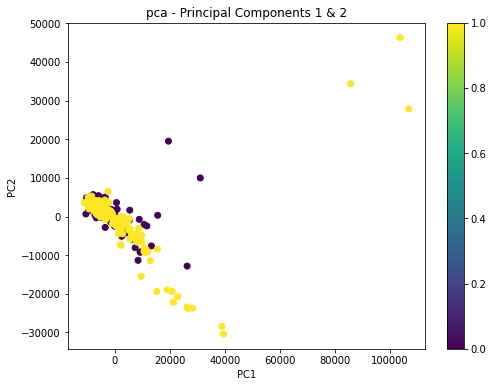

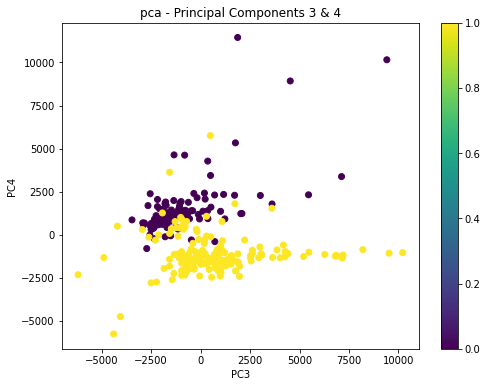

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


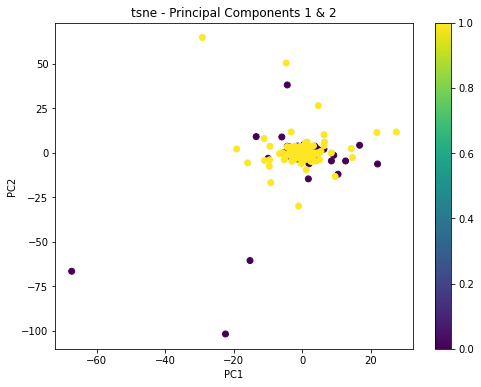

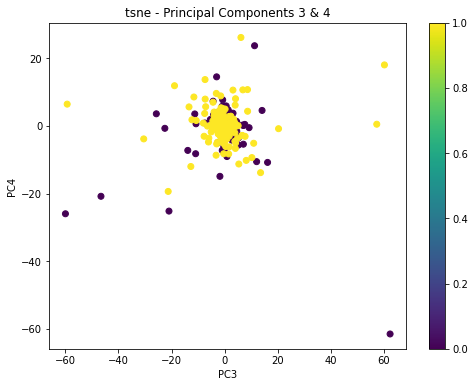

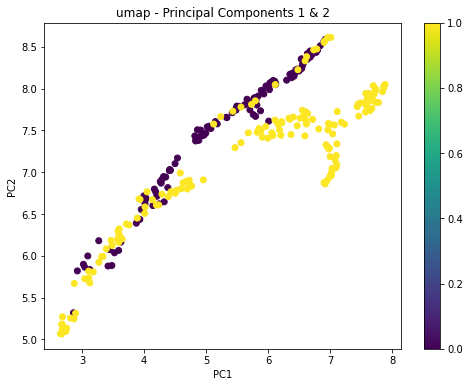

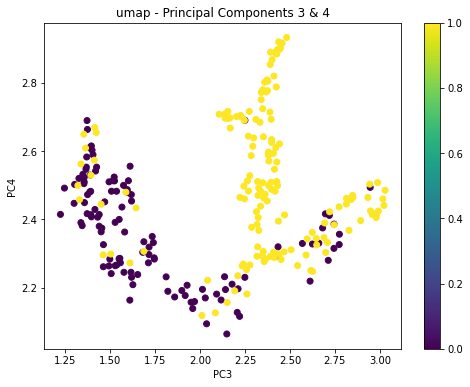

In [12]:
# Start with a clean dataset.
fish_data = binary_classification()

# Split into features and labels.
X = fish_data.drop('class', axis=1)
y = fish_data['class']

# Number of components.
n = 20

# For each feature reduction method, perform dimensionality reduction, evaluate classification performance.
for name_reducer, reducer in reducers.items():

    # Perform feature reduction.
    r = reducer(n_components=n)
    r.fit(X)
    X_pca = r.fit_transform(X)

    # Plot the first two principal components
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.colorbar()
    plt.title(f"{name_reducer} - Principal Components 1 & 2")
    plt.show()

    # Plot the third and fourth principal components
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 2], X_pca[:, 3], c=y, cmap='viridis')
    plt.xlabel('PC3')
    plt.ylabel('PC4')
    plt.colorbar()
    plt.title(f"{name_reducer} - Principal Components 3 & 4")
    plt.show()

## Ablation Studies - Empirical validation 

To verify empirically, we can measure the prediction accuracy of a classification model trained solely on 1 \& 2, versus features 3 \& 4, the better performance indicates less noise and more signal in the extracted features.


In [18]:
from functools import partial
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

# Dimensionality reduction techniques 
reducers = {
    "pca" : PCA,
    # Fix https://bit.ly/3HF8byo
    "tsne": partial(TSNE, method='exact'),
    "umap": UMAP
}

# Number of components.
n = 20

# For each feature reduction method, perform dimensionality reduction, evaluate classification performance.
for name_reducer, reducer in reducers.items():
    # Start with a clean dataset.
    fish_data = binary_classification()

    # Split into features and labels.
    X = fish_data.drop('class', axis=1)
    y = fish_data['class']

    # Perform feature reduction.
    r = reducer(n_components=n)
    r.fit(X)
    X = r.fit_transform(X)

    print(f"{name_reducer} (n={n})")

    # Evaluate performance on dimensionality reduction techniques.
    for f_start, f_end in [(0,1),(2,3)]:
        # Take the 2 features from a 2D numpy array.
        X_subset = X[:, f_start:f_end + 1]
        print(len(X_subset[0]))
        scores = cross_val_score(SVC(), X_subset, y, cv=10)
        print(f"{name} - Accuracy: {scores.mean()} ± {scores.std()}")

pca (n=20)
2
lda - Accuracy: 0.5547619047619048 ± 0.06688519236539535
2
lda - Accuracy: 0.8640211640211639 ± 0.16256371591223712


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


tsne (n=20)
2
lda - Accuracy: 0.5724867724867725 ± 0.020327378531532853
2
lda - Accuracy: 0.558068783068783 ± 0.03693509212397229
umap (n=20)
2
lda - Accuracy: 0.8527777777777779 ± 0.15170412269124986
2
lda - Accuracy: 0.8123015873015872 ± 0.1715802227027035
